
The weights are udated using the following formula:  
$W = W - learningRate * \frac{\partial (CrossEntropy)}{\partial (W)}$

## $\frac{\partial (CrossEntropy)}{\partial (W_{2})} = \frac{\partial (CrossEntropy(SoftMax))}{\partial (L2)} \frac{\partial (L2)}{\partial (W_{2})}$
$ \hspace{6cm}{=(softmax-y_{i})} \hspace{1cm}{*L_{1}^{T}}$

## $\frac{\partial (CrossEntropy)}{\partial (Bias_{2})} = \frac{\partial (CrossEntropy(SoftMax))}{\partial (L2)}  \frac{\partial (L2)}{\partial (Bias_{2})}$

$\hspace{6cm}{=(softmax-y_{i})}  *  \frac{\partial (L2)}{\partial (Bias_{2})}  $

## $\frac{\partial (CrossEntropy)}{\partial (W_{1})} = \frac{\partial (CrossEntropy(SoftMax))}{\partial (L2)}  \frac{\partial (L2)}{\partial (L_{1})} \frac{\partial (L_{1})}{\partial (LL_{1})}  \frac{\partial (LL_{1})}{\partial (W_{1})}$

$ \hspace{6cm}{=(softmax-y_{i}) * W_{2} * (L_1 \cdot (1-L_1)) * X}$

## $\frac{\partial (CrossEntropy)}{\partial (Bias_{1})} = \frac{\partial (CrossEntropy(SoftMax))}{\partial (L2)}  \frac{\partial (L2)}{\partial (L_{1})} \frac{\partial (L_{1})}{\partial (LL_{1})}  \frac{\partial (LL_{1})}{\partial (Bias_{1})}$
$ \hspace{6cm}{=(softmax-y_{i}) * W_{2} * (L_1 \cdot (1-L_1)) * X}$

In [43]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:
num_patterns = 200
num_features = 2
mu, sigma = 0, 0.5
num_classes = 3
num_hidden_neurons = 6
Xred = np.random.normal(mu, sigma, (num_patterns, num_features)) + np.array([1,1])
Yred = np.zeros(num_patterns, dtype=int)
Xblue = np.random.normal(mu, sigma, (num_patterns, num_features)) + np.array([-1,-1])
Yblue = np.ones(num_patterns, dtype=int)
Xgreen = np.random.normal(mu, sigma, (num_patterns, num_features)) + np.array([1,-1])
Ygreen = np.ones(num_patterns, dtype=int)
X = np.concatenate((Xred, Xblue, Xgreen), axis=0)
num_patterns = num_patterns * 3
Y = np.concatenate((Yred, Yblue, Ygreen), axis=0)

#standarize
Y_hot = np.zeros((Y.size, Y.max()+1))
Y_hot[np.arange(Y.size),Y] = 1
Y = np.reshape(Y, (-1,1))

In [45]:
W1 = np.random.random_sample((num_features, num_hidden_neurons)) - 0.5
Bias1 = np.random.random_sample((1, num_hidden_neurons)) - 0.5
W2 = np.random.random_sample((num_hidden_neurons, num_classes)) - 0.5
Bias2 = np.random.random_sample((1, num_classes)) - 0.5

In [46]:
N = 500  # Num iterations
learning_rate = 0.01
def sigm(x):
    return 1/(1 + np.exp(-x))

def softmax(x):
    a = np.exp(x)
    return a/sum(a)

def softmax1(x):
    a = np.exp(x)
    return a/np.sum(a)
       
def softmax(x):
    return np.apply_along_axis(softmax1, 1, x)

def cross_entropy(X,y):
    # https://deepnotes.io/softmax-crossentropy
    m = y.shape[0]    
    p = X 
    log_likelihood = -np.log(p[range(m),y])
    loss = np.sum(log_likelihood) / m
    return loss


def delta_cross_entropy(X,y):
    m = y.shape[0]
    grad = X
    grad[range(m),y] -= 1
    grad = grad/m
    return grad

def CCR(out, target_hot):
    fff = np.argmax(out, axis=0)
    return fff
    

In [47]:
acc_error = []
for i in range(N):
    #calculate output
    LL1 = X.dot(W1) + Bias1
    L1 = sigm(LL1)
    L2 = L1.dot(W2) + Bias2
    output = softmax(L2) 
    # calculate error
    error = cross_entropy(output, Y)
    acc_error.append(error)
    accr = CCR(output, Y_hot)
    #print(accr)
    #print(error)


    #calculate Gradients
    W1_grad = W1 * 0
    Bias1_grad = Bias1 * 0
    W2_grad = W2 * 0
    Bias2_grad = Bias2 * 0

    cross_entropy_grad = delta_cross_entropy(output, Y)

    W2_grad =  np.transpose(np.transpose(cross_entropy_grad).dot(L1))       
    Bias2_grad = np.transpose(np.transpose(cross_entropy_grad).dot(np.ones((num_patterns,1))))  
    
    W1_grad = np.transpose(np.transpose(cross_entropy_grad.dot(np.transpose(W2)) *L1*(1-L1)).dot(X)) 
    Bias1_grad = np.transpose(np.transpose(cross_entropy_grad.dot(np.transpose(W2)) *L1*(1-L1)).dot(np.ones((num_patterns,1)))) 

    #update weights
    W1 = W1 - learning_rate * W1_grad
    Bias1 = Bias1 - learning_rate * Bias1_grad
    W2 = W2 - learning_rate * W2_grad
    Bias2 = Bias2 - learning_rate * Bias2_grad

[225 371   0]


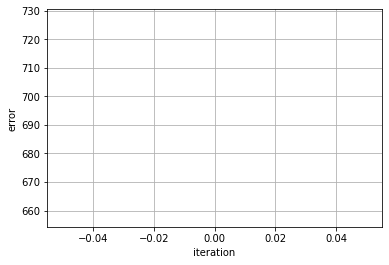

In [48]:
plt.plot(range(N), acc_error)
plt.grid()
plt.xlabel('iteration')
plt.ylabel('error')
plt.show()